In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import viz_functions as viz
import data_prep_functions as prep
import seaborn as sns

In [7]:
data = pd.read_pickle('Data/data_log_transformed.pkl')

In [8]:
labels = {
    '%_FEMALE': 'Share of Female Officers',
    '%_BLACK': 'Share of Black Officers',
    '%_HISP': 'Share of Hispanic Officers',
    'CCRB': 'Share of Officers in CCRB-Covered Agencies',
    'CFDBK_POLICY': 'Share of Officers in Agencies Using Community Feedback',
    'STD_FORCE_TO_RESIDENT': 'Lethal Force Incidents per 100k Residents (std)',
    'STD_FORCE_TO_CRIME': 'Lethal Force Incidents per 1k Reported Crimes (std)'
}

In [9]:
data.describe()

,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,POPULATION,TOTAL_CRIME,USE_OF_FORCE_COUNT,%_FORCE_TO_RESIDENT,%_FORCE_TO_CRIME,STD_FORCE_TO_RESIDENT,STD_FORCE_TO_CRIME
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000,102.0,102.0,102.0,102.0
mean,2018.000000,8526.705882,0.109747,0.091332,0.066859,0.132160,0.213083,6398153.294118,166345.45098,59.637255,0.682369,0.327593,0.367788,0.384978
std,2.009877,11902.323814,0.035160,0.087081,0.074606,0.127327,0.174862,7273752.789691,198709.704168,69.649020,0.239457,0.11642,0.191006,0.216637
min,2016.000000,286.000000,0.034928,0.002022,0.003974,0.000000,0.000000,582328.0,8667.0,2.000000,0.221287,0.120708,0.0,0.0
25%,2016.000000,2053.750000,0.081306,0.020203,0.020794,0.062907,0.049359,1795318.5,41563.5,17.750000,0.517451,0.246205,0.236239,0.23353
50%,2018.000000,4230.500000,0.107293,0.067991,0.034746,0.094810,0.194497,4457112.5,120965.0,43.000000,0.666236,0.309326,0.354919,0.350985
75%,2020.000000,9489.750000,0.129991,0.124506,0.071973,0.163380,0.342843,7388050.75,200628.25,74.500000,0.80921,0.398142,0.468964,0.516259
max,2020.000000,60466.000000,0.215203,0.424147,0.317544,0.693147,0.693147,39368078.0,1176866.0,435.000000,1.474948,0.658102,1.0,1.0


In [10]:
def plot_histogram(df, column, bins=15, color='#1f77b4', label_dict=None, figsize=(8, 5)):
    """
    Plots a histogram for a specified column.


    :param df (pd.DataFrame): Input DataFrame.
    :param column (str): The column to plot.
    :param bins (int): Number of bins in the histogram.
    :param color (str): Bar color.
    :param label_dict (dict): Optional mapping of column names to human-readable labels.
    :param figsize (tuple): Figure size.
    """
    label = label_dict.get(column, column) if label_dict else column

    plt.figure(figsize=figsize)
    df[column].hist(bins=bins, color=color, edgecolor='white')
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Number of States')
    plt.tight_layout()
    plt.show()

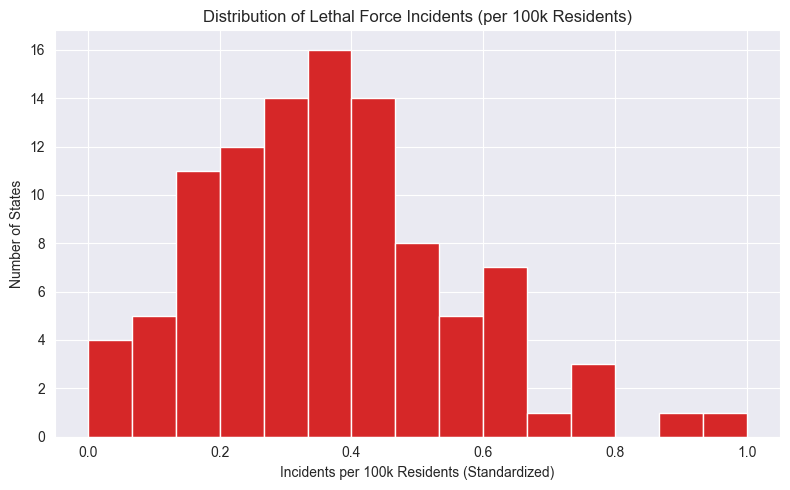

In [11]:
plt.figure(figsize=(8, 5))
data['STD_FORCE_TO_RESIDENT'].hist(bins=15, color='#d62728', edgecolor='white')
plt.title('Distribution of Lethal Force Incidents (per 100k Residents)')
plt.xlabel('Incidents per 100k Residents (Standardized)')
plt.ylabel('Number of States')
plt.tight_layout()
plt.show()

In [12]:
data['LOG_FORCE_RESIDENT'] = np.log1p(data['%_FORCE_TO_RESIDENT'])
data['N_LOG_FORCE_RESIDENT'] = prep.standardize(data['LOG_FORCE_RESIDENT'])

In [13]:
data['LOG_FORCE_CRIME'] = np.log1p(data['%_FORCE_TO_CRIME'])
data['N_LOG_FORCE_CRIME'] = prep.standardize(data['LOG_FORCE_CRIME'])

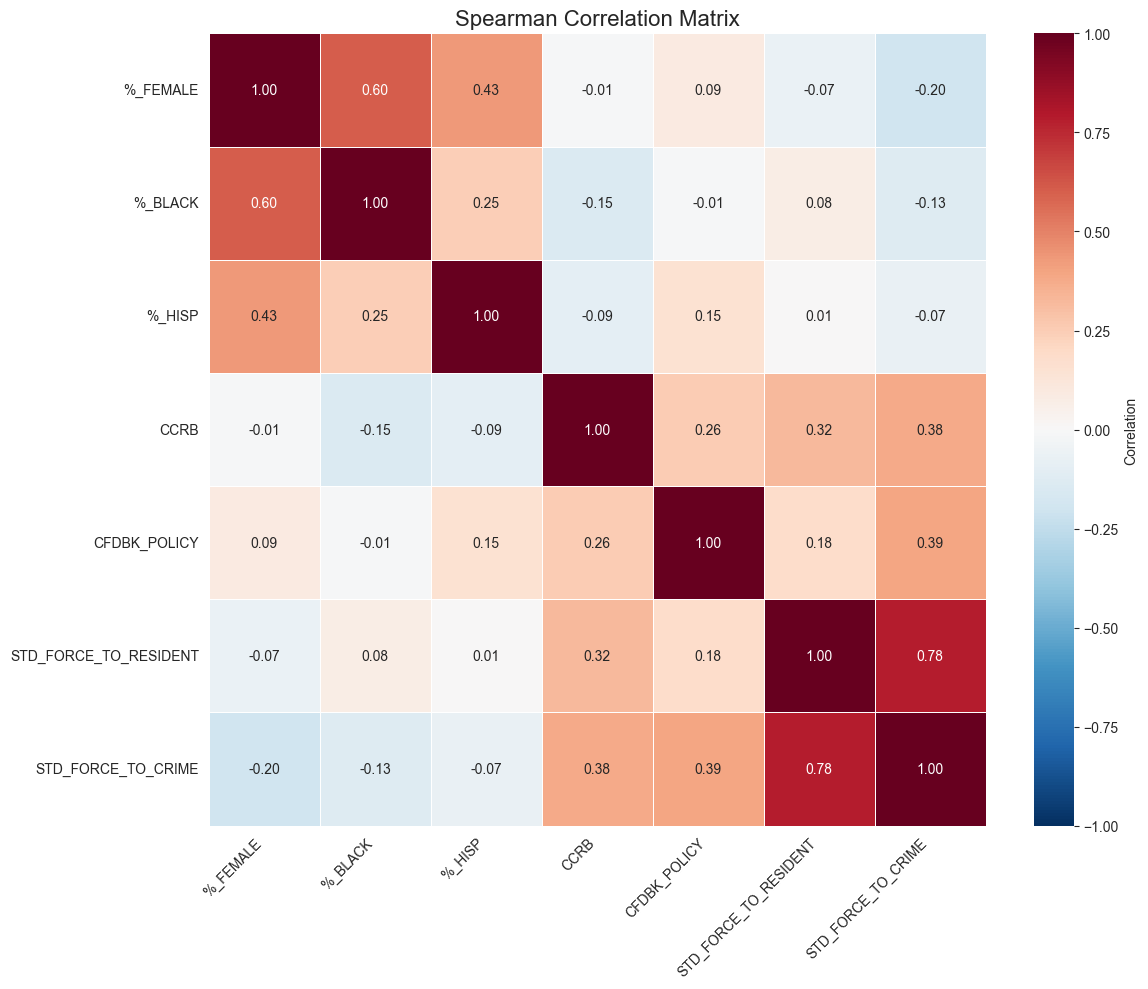

In [14]:
corr = data[['%_FEMALE', '%_BLACK', '%_HISP', 'CCRB',
       'CFDBK_POLICY', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']]
viz.plot_correlation_matrix(corr)

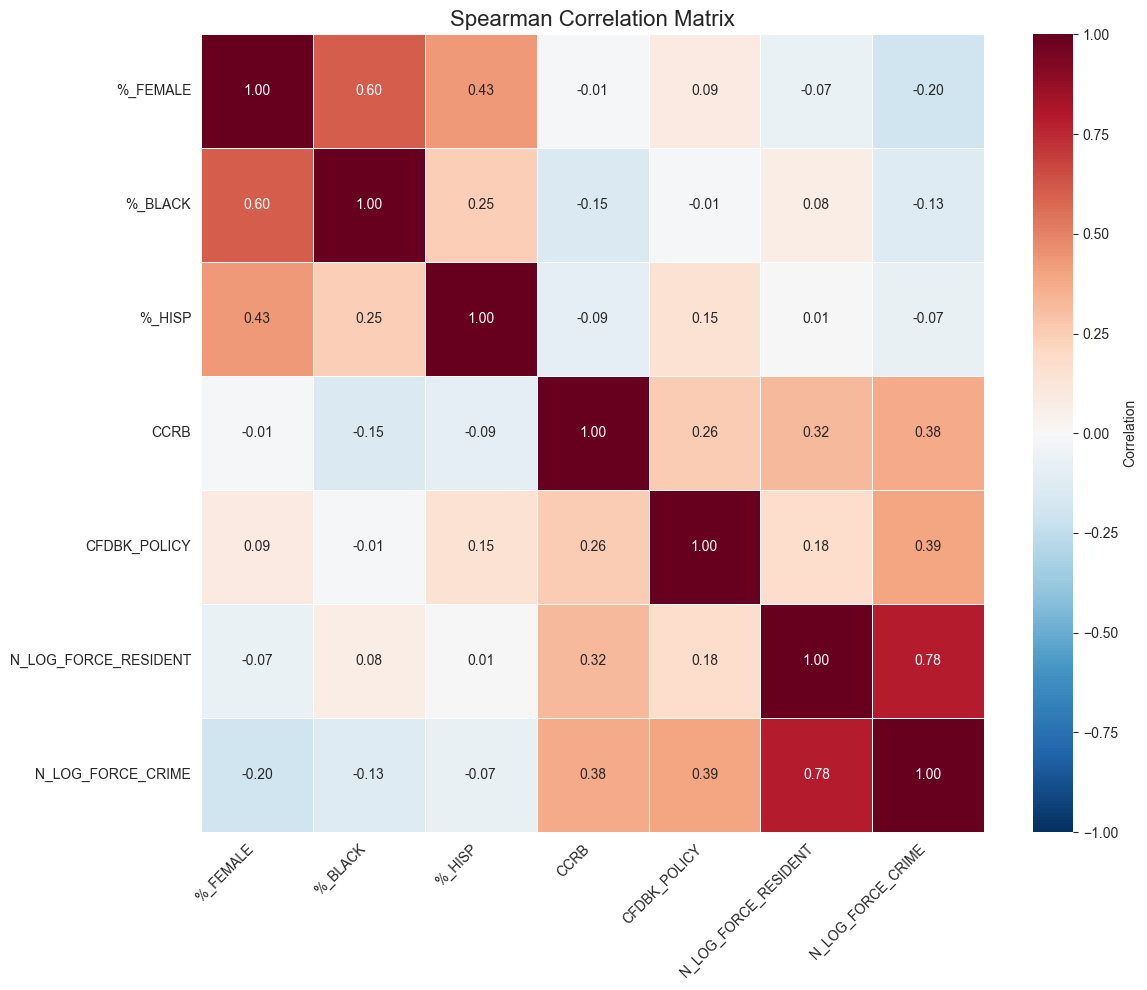

In [15]:
corr = data[['%_FEMALE', '%_BLACK', '%_HISP', 'CCRB',
       'CFDBK_POLICY', 'N_LOG_FORCE_RESIDENT', 'N_LOG_FORCE_CRIME']]
viz.plot_correlation_matrix(corr)

## Hypothesis 1 Analysis: Share of Female Officers vs. Lethal Force Incidents
*States that have a higher proportion of female officers will have a less lethal force incidents per year.*

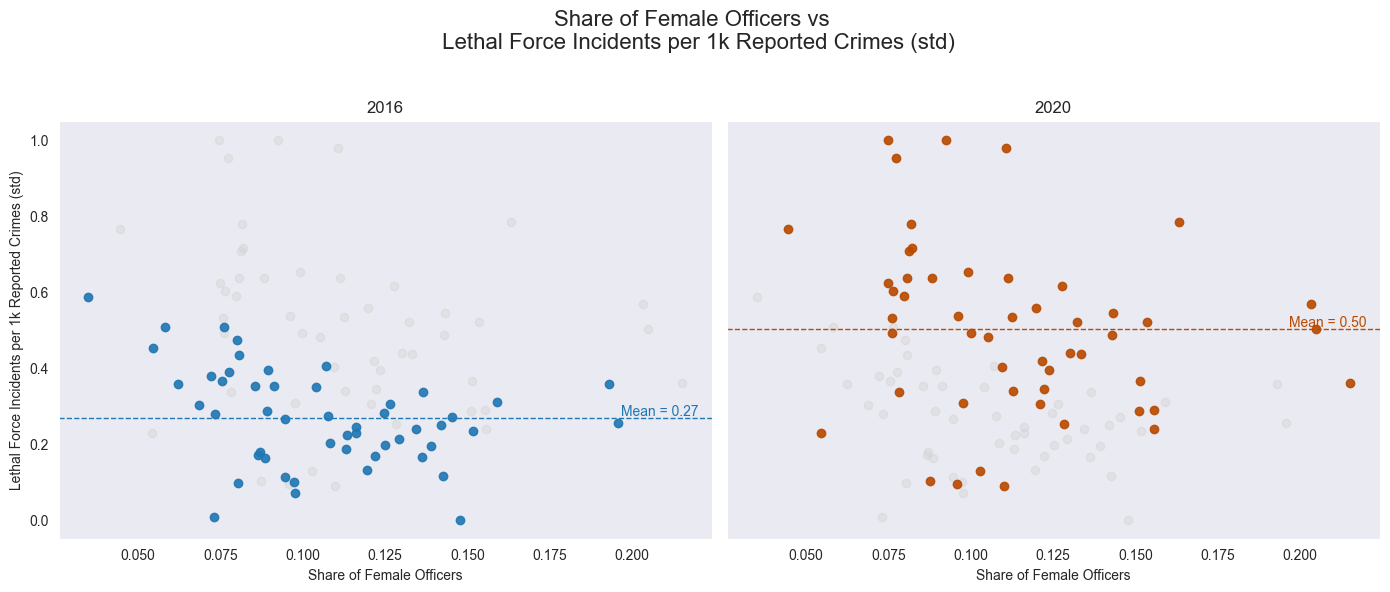

In [16]:
viz.scatter_dual_year_highlight(data, '%_FEMALE','STD_FORCE_TO_CRIME', label_map= labels)

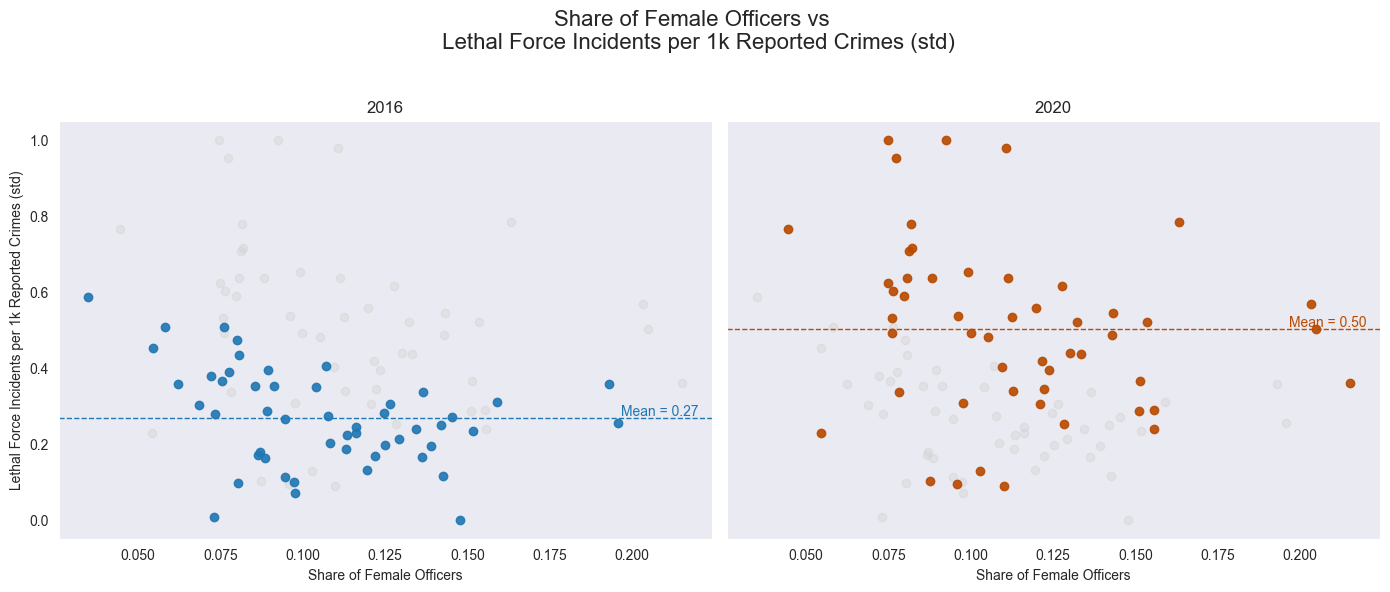

In [17]:
viz.scatter_dual_year_highlight(data, '%_FEMALE','STD_FORCE_TO_CRIME', label_map= labels)

## Hypothesis 2 Analysis: Minority Officer Representation vs. Lethal Force Incidents
*States that have a higher proportion of minority officers (Black, Latino) are less likely to be involved in lethal force incidents.*

In [ ]:
viz.scatter_dual_year_highlight(data, '%_BLACK','STD_FORCE_TO_RESIDENT', label_map= labels)

In [ ]:
viz.scatter_dual_year_highlight(data, '%_BLACK','STD_FORCE_TO_CRIME', label_map= labels)

In [ ]:
viz.scatter_dual_year_highlight(data, '%_HISP','STD_FORCE_TO_RESIDENT', label_map= labels)

In [ ]:
viz.scatter_dual_year_highlight(data, '%_HISP','STD_FORCE_TO_CRIME', label_map= labels)

## Hypothesis 3 Analysis: Minority Officer Representation vs. Lethal Force Incidents
*States where a greater share of officers are employed in agencies with a civilian complaint review board will have a less lethal force incidents per year.*

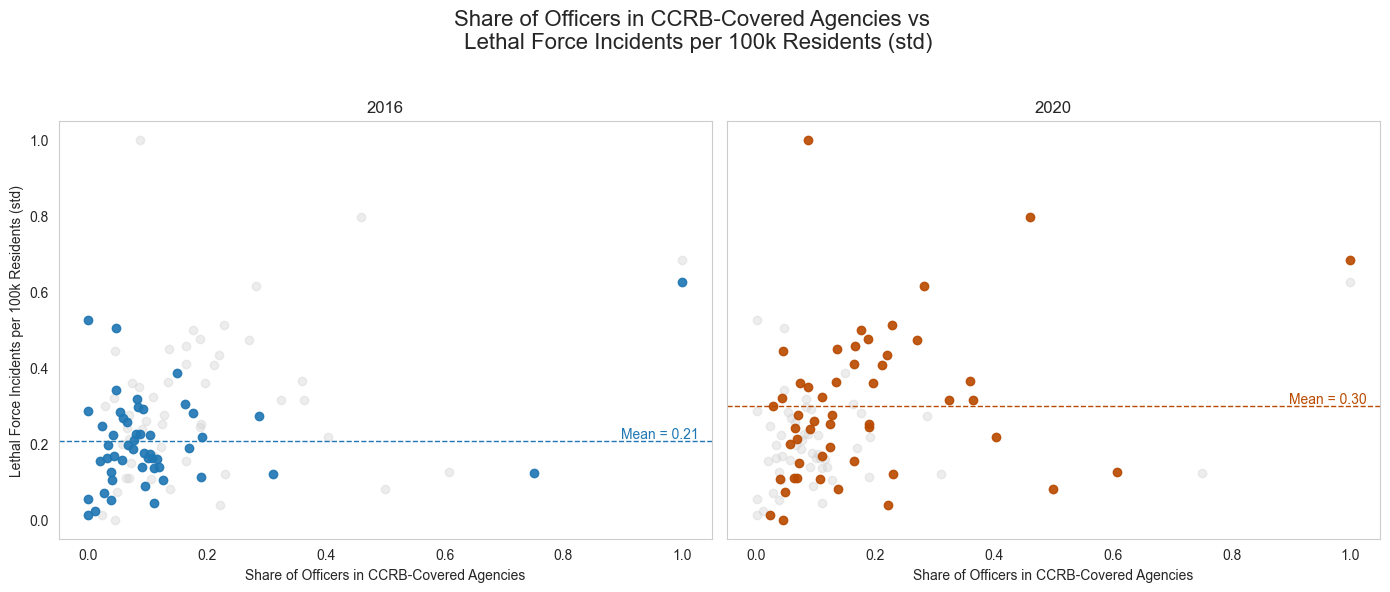

In [9]:
viz.scatter_dual_year_highlight(data, 'CCRB','STD_FORCE_TO_RESIDENT', label_map= labels)

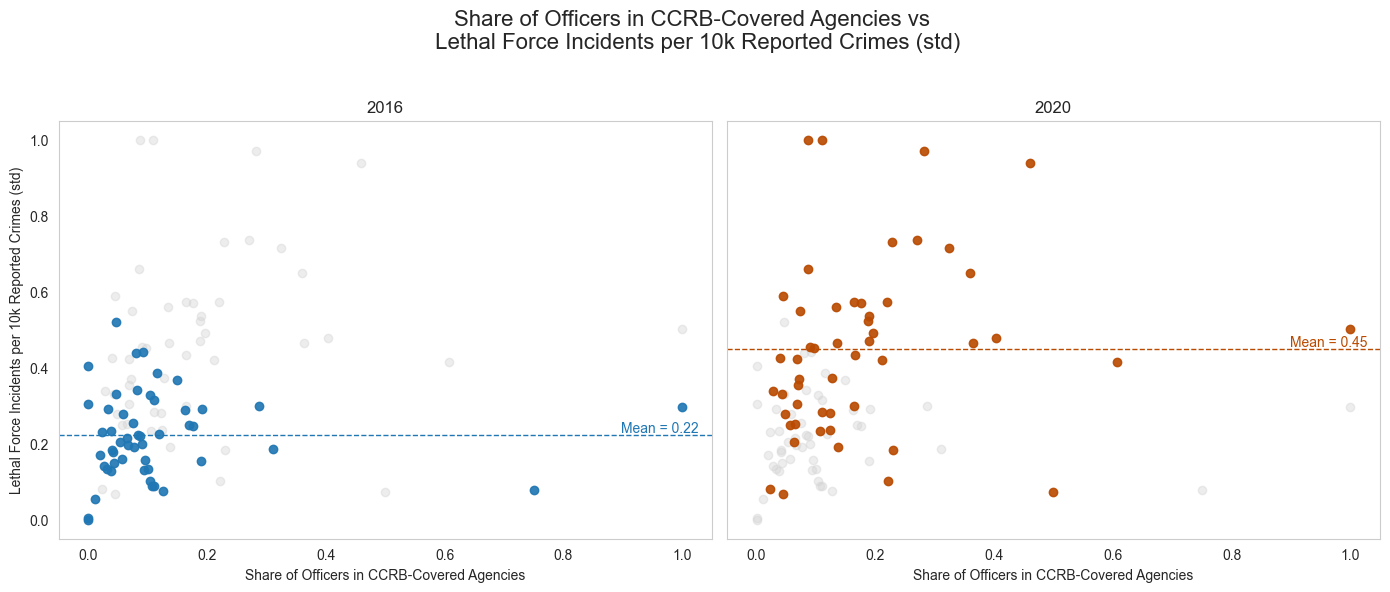

In [10]:
viz.scatter_dual_year_highlight(data, 'CCRB','STD_FORCE_TO_CRIME', label_map= labels)

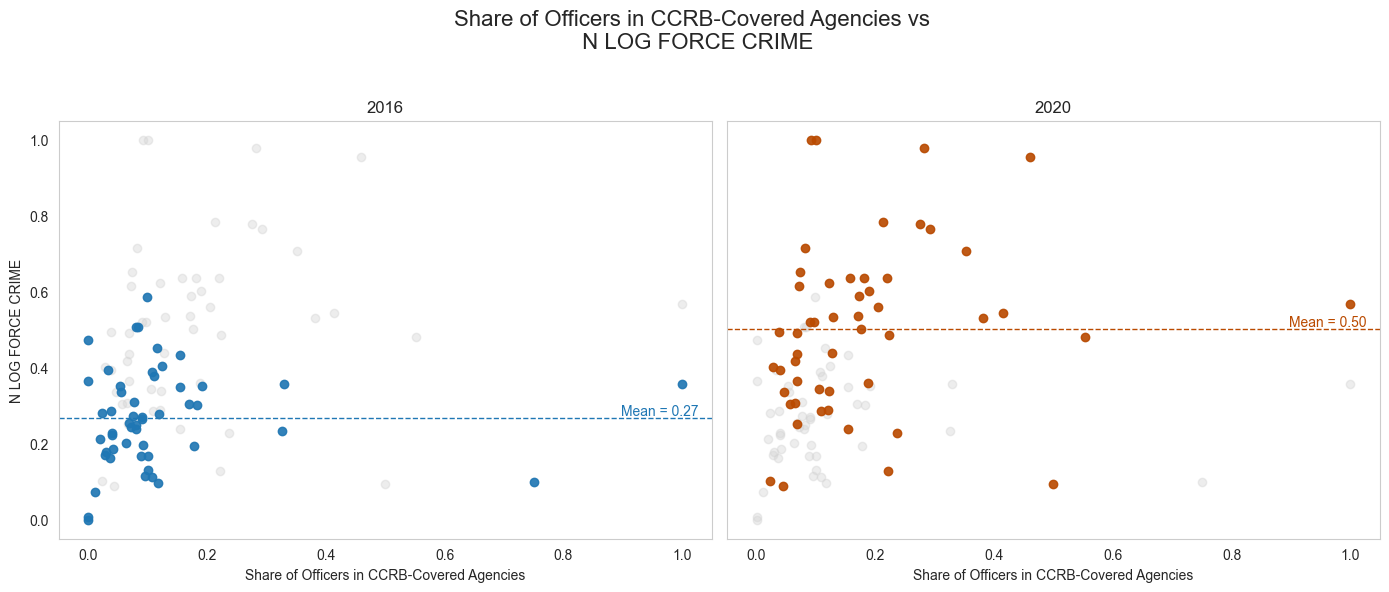

In [70]:
viz.scatter_dual_year_highlight(data, 'CCRB','N_LOG_FORCE_CRIME', label_map= labels)

The scatter plots show that the relationship between CCRB coverage and lethal force rates isn’t very linear. Some states with low CCRB coverage had the highest rates, and the one with full coverage still had above-average use of force. When comparing across years, CCRB coverage appears to have increased: in 2016, most states were clustered on the lower end, while in 2020, the points are more spread out and extend further to the right, suggesting broader or more varied adoption across states.

In [71]:
from scipy.stats import spearmanr

r, p = spearmanr(data['CCRB'], data['STD_FORCE_TO_RESIDENT'])
print(f"Spearman r = {r:.3f}, p = {p:.3f}")

Spearman r = 0.322, p = 0.001


In [58]:
r, p = spearmanr(data['CCRB'], data['STD_FORCE_TO_CRIME'])
print(f"Spearman r = {r:.3f}, p = {p:.3f}")

Spearman r = 0.378, p = 0.000


From the spearman correlations we san see a **moderate positive relationship**, suggesting that states with greater CCRB presence tend to have higher rates of lethal force incidents. This goes against our expectation that more accountability (via CCRBs) would be linked to lower lethal force rates, this could be because CCRBs are being implemented reactively—in response to high number of use-of-force incidents.

In [60]:
for year in [2016, 2020]:
    year_sub = data[data['YEAR'] == year]
    r, p = spearmanr(year_sub['CCRB'], year_sub['STD_FORCE_TO_RESIDENT'])
    print(f"Year {year}: Spearman r = {r:.3f}, p = {p:.3f}")

Year 2016: Spearman r = 0.163, p = 0.254
Year 2020: Spearman r = 0.360, p = 0.009


In [61]:
for year in [2016, 2020]:
    year_sub = data[data['YEAR'] == year]
    r, p = spearmanr(year_sub['CCRB'], year_sub['STD_FORCE_TO_CRIME'])
    print(f"Year {year}: Spearman r = {r:.3f}, p = {p:.3f}")

Year 2016: Spearman r = 0.212, p = 0.135
Year 2020: Spearman r = 0.357, p = 0.010


The relationship between CCRB coverage and standardized lethal force rates strengthened from 2016 to 2020. In both population- and crime-normalized metrics, the 2020 correlations were moderate and statistically significant, while 2016 showed weaker, non-significant results. This supports Hypothesis 4, though the positive direction of the relationship contradicts Hypothesis 3.

In [72]:
def plot_quartile_boxplot(df, x_var, y_var, label_map=None, n_quartiles=4):
    """
    Plots a boxplot of y_var across quartiles of x_var.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        x_var (str): The column to bin into quartiles.
        y_var (str): The dependent variable to plot on the y-axis.
        label_map (dict): Optional dictionary to map x_var and y_var to readable labels.
        n_quartiles (int): Number of quantile bins (default = 4).
    """
    # Create quartile labels
    quartile_labels = [f'Q{i+1}' for i in range(n_quartiles)]
    quartile_labels[0] += ' (Lowest)'
    quartile_labels[-1] += ' (Highest)'

    # Create new quartile column
    quartile_col = f'{x_var}_Q'
    df[quartile_col] = pd.qcut(df[x_var], q=n_quartiles, labels=quartile_labels)

    # Get readable axis labels if provided
    x_label = label_map.get(x_var, x_var) if label_map else x_var
    y_label = label_map.get(y_var, y_var) if label_map else y_var

    # Plot
    sns.boxplot(data=df, x=quartile_col, y=y_var, color='#1f77b4')
    plt.title(f'{y_label} by {x_label} Quartile')
    plt.xlabel(f'{x_label} Quartile')
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

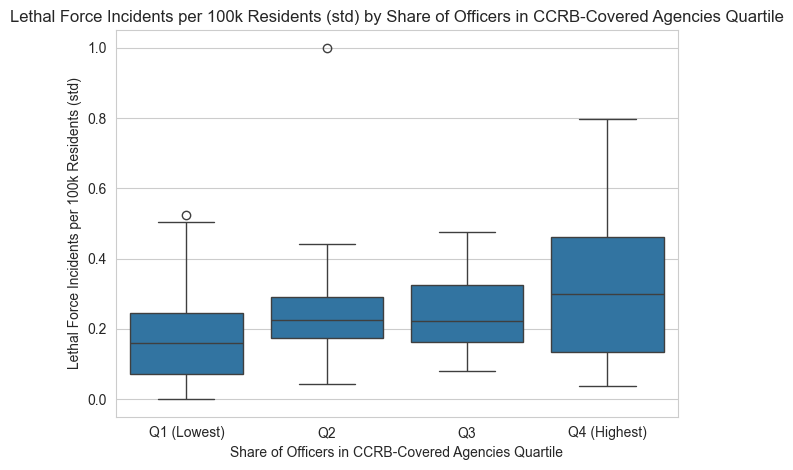

In [77]:
plot_quartile_boxplot(data, x_var='CCRB', y_var='STD_FORCE_TO_RESIDENT', label_map=labels)